In [1]:
#Imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math
import sys
from mpl_toolkits.mplot3d import Axes3D

(97, 2)


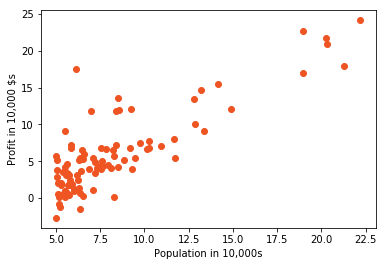

In [2]:
# Reading and plotting data
data = pd.read_csv('ex1data1.csv', header=None)
print data.shape
X = data[0]
Y = data[1]

plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
plt.ylabel('Profit in 10,000 $s');
plt.xlabel('Population in 10,000s');

In [3]:
# Q.1 Linear Regression Gradient Decent One variable without matrix

def get_rmse(x, y, weight, bias):
    m = len(x)
    total_error = 0.0
    for i in range(m):
        total_error += (y[i] - (weight*x[i] + bias))**2
    return math.sqrt(total_error / m)

def update_weights(x, y, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    m = len(x)

    for i in range(m):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*x[i] * (y[i] - (weight*x[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(y[i] - (weight*x[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / m) * learning_rate
    bias -= (bias_deriv / m) * learning_rate

    return weight, bias

def fit(x, y, weight, bias, learning_rate, iters):
    cost_history = []
    weights = []
    biases = []
    old_cost = sys.maxsize
    new_cost = sys.maxsize
    while(True):
        weight,bias = update_weights(x, y, weight, bias, learning_rate)
        weights.append(weight)
        biases.append(bias)
        #Calculate cost for auditing purposes
        old_cost = new_cost
        new_cost = get_rmse(x, y, weight, bias)
        if(old_cost - new_cost < 0.00001):
            #print("breaking" + str(old_cost) + str(new_cost))
            break;
        cost_history.append(new_cost)

        # Log cost
        #print "cost: "+str(new_cost)

    return weights, biases, new_cost

# def plot_predictions(X, beta0, beta1, cost_history):
#     fig = plt.figure(figsize=(10, 6))
#     ax = fig.add_subplot(111, projection='3d')

#     ax.plot_surface(beta0, beta1, cost_history, rstride=1, cstride=1, color='b', alpha=0.1)
#     ax.contour(beta0, beta1, cost_history, 20, color='b', alpha=0.5, offset=0, stride=30)


#     ax.set_xlabel('Intercept')
#     ax.set_ylabel('Slope')
#     ax.set_zlabel('Cost')
#     ax.view_init(elev=30., azim=30)
#     #ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);
#     #ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);


#     #ax.plot([t[0] for t in history2], [t[1] for t in history2], cost2 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);
#     ax.plot([b[0] for b in beta0], [b[1] for b in beta1], cost_history[0] , alpha=0.5, markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);
#     ax.plot([b[0] for b in beta0], [b[1] for b in beta1], 0 , alpha=0.5, markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);

b1, b0, cost = fit(X.values, Y.values, 0, 0, 0.01, 10000)
print "Root mean square error is "+ str(cost)
# plot_predictions(X.values, b0, b1, cost)

Root mean square error is 2.99368713529


In [4]:
# Q.2-1 - Linear Regression with Multiple Varibles using Gradient Descent
points = Y.size # Number of predictions in the data
alpha = 0.01 # Learning rate
itrs = 1700 # Number of iterations
np.random.seed(123) # Fixing the seed value to avoid diffent data
beta = np.random.rand(2) # For now keeping 2

## Grdient Decent Function
def gradient_decent(X, Y, beta):
    costs = []
    coefficients = []
    for i in range(itrs):
        pred = np.dot(X, beta)
        err = pred - Y
        cost = 1/( (2 * size) * (np.dot(err.T, err)))
        beta = beta - ( alpha * (1/size) * np.dot(X.T, error))
        costs.append(cost)
        coefficients.append(beta)
    return costs, coefficients

costs, coefficients = gradient_decent(X, Y, beta)

ValueError: shapes (97,) and (2,) not aligned: 97 (dim 0) != 2 (dim 0)